In [79]:
using PyPlot

In [2]:
h1(x1,x2)=[(2x1^3-4x1*x2+8) (-2x1^2+8x2+8)]' #∇f(x)
h2(x1,x2)=reshape([[6x1^2-4x2 -4x1] [-4x1 8]],(2,2)) # hesse行列

h2 (generic function with 1 method)

In [3]:
h1(3,1) # 初期値(3,1)^T

2×1 Array{Int64,2}:
 50
 -2

In [4]:
h2(3,1)

2×2 Array{Int64,2}:
  50  -12
 -12    8

In [5]:
h2(3,1)^-1 * -h1(3,1)

2×1 Array{Float64,2}:
 -1.46875
 -1.95313

In [6]:
x0 = [3 1]' # 初期値
a0 = 1 # ステップ幅

1

In [7]:
d0 = h2(3,1)^-1 * -h1(3,1) # ニュートン方程式に代入した結果

2×1 Array{Float64,2}:
 -1.46875
 -1.95313

In [8]:
x1 = x0 + a0*d0

2×1 Array{Float64,2}:
  1.53125 
 -0.953125

In [9]:
xk = [3 1]'
dk = h2(xk[1],xk[2])^-1 * -h1(xk[1],xk[2])
x = xk + a0*dk

2×1 Array{Float64,2}:
  1.53125 
 -0.953125

In [63]:
ims = []
xk = [3 1]'
for i in 1:5
    dk = h2(xk[1],xk[2])^-1 * -h1(xk[1],xk[2])
    x = xk + a0*dk
    xk = x
    push!(ims,x')
end

In [64]:
ims

5-element Array{Any,1}:
 [1.53125 -0.953125] 
 [0.188303 -1.44201] 
 [-1.29394 -1.13069] 
 [-1.35257 -0.543498]
 [-1.36471 -0.534426]

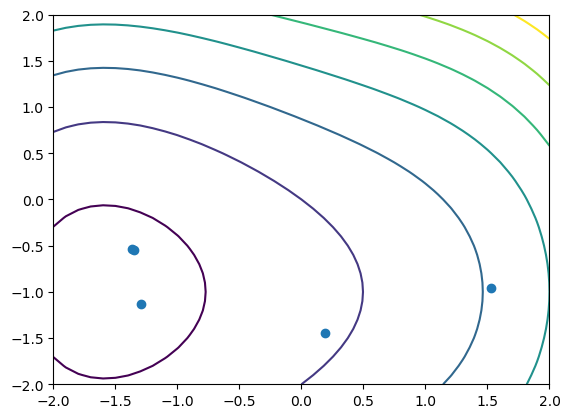

PyObject <matplotlib.collections.PathCollection object at 0x11fcbec50>

In [78]:
f(x1,x2) = 1/2 .* x1.^4 -2(x1.^2)*x2 + 4.*x2.^2 + 8x1 + 8x2
x1,x2 = (collect(-2:0.1:2),collect(-2:0.1:2))
x1_grid = repeat(x1',outer=(length(x2),1))
x2_grid = repeat(x2, outer=(1,length(x1)))
axes()[:contour](x1_grid,x2_grid,f(x1_grid,x2_grid))
axes()[:scatter]([ims[1][1],ims[2][1],ims[3][1],ims[4][1],ims[5][1]],[ims[1][2],ims[2][2],ims[3][2],ims[4][2],ims[5][2]])